# Airplanes Risk Analysis for Business Expansion

**Author:** Isaiah Juma
***

## Overview
Company is expanding into the aviation industry and needs to identify low-risk aircraft for commercial and private operations. 
An analysis of the aviation accidents and incidents is therefore required to be analyzed to provide key insights to help in decision making for aircraft purchasing

## Business Problem
Expansion to new business segment can make the company struggle to identify Low-Risk Aircraft. This lack of insight can result in ineffective purchases, wasted resources and lost opportunities.

### Objectives
* To gain knowledge on the potential risks of different aircraft.
* To identify Low-Risk Aircraft for new Aviation Business.
* To provide actionable insights for decision making on purchasing aircraft.

### Research Questions
* What are the potential risks trends for the different types of aircraft?
* Which factors influence the identification of Low-Risk Aircraft?
* Can we predict future aircraft purchasing behavior based on historical data?
  
### Methodology* Data Collection: Gather historical aviation data.
* Data Cleaning: Preprocess the data to handle missing values and duplicates.
* Feature Engineering: Create relevant features for analysis and modeling.
* Interpretation: Analyze the results and derive actionable insights.

### Success Criteria
* Recommendations that lead to a measurable low-risk aircraft purchasing through making data driven decisions.


## Data Understanding
National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents 
and selecetd incidents in the United States and international waters was used for analysis.  *https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses* The data contains attributes such as aircraft damage, make and model as well as injuries*

In [5]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# loading data
aviation_df = pd.read_csv('AviationData.csv', encoding='latin1',low_memory=False)

In [7]:
aviation_df.shape

(88889, 31)

In [8]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [10]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
#Statistical Summary
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

In [13]:
# code to clean the data
#Check Missing values
aviation_df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [14]:
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [15]:
# checking Duplicates
aviation_df.duplicated().sum()

0

In [16]:
# Drop columns with significant high number of null values that have little impact in analysis
aviation_df.drop(['Latitude','Longitude','Airport.Code','Airport.Name','Air.carrier','Aircraft.Category','Registration.Number','Amateur.Built','Number.of.Engines','Engine.Type','FAR.Description','Schedule','Report.Status','Publication.Date'], axis=1, inplace=True)

In [17]:
# Droping rows with null values that will contribute to the analysis.
aviation_df.dropna(subset=['Make','Model','Aircraft.damage','Injury.Severity','Weather.Condition','Location','Country','Purpose.of.flight'], inplace=True)

In [18]:
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                         0
Purpose.of.flight             0
Total.Fatal.Injuries       9878
Total.Serious.Injuries    10905
Total.Minor.Injuries      10223
Total.Uninjured            5187
Weather.Condition             0
Broad.phase.of.flight     20645
dtype: int64

In [19]:
#Reloading the dataset
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79754 entries, 0 to 88886
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                79754 non-null  object 
 1   Investigation.Type      79754 non-null  object 
 2   Accident.Number         79754 non-null  object 
 3   Event.Date              79754 non-null  object 
 4   Location                79754 non-null  object 
 5   Country                 79754 non-null  object 
 6   Injury.Severity         79754 non-null  object 
 7   Aircraft.damage         79754 non-null  object 
 8   Make                    79754 non-null  object 
 9   Model                   79754 non-null  object 
 10  Purpose.of.flight       79754 non-null  object 
 11  Total.Fatal.Injuries    69876 non-null  float64
 12  Total.Serious.Injuries  68849 non-null  float64
 13  Total.Minor.Injuries    69531 non-null  float64
 14  Total.Uninjured         74567 non-null  flo

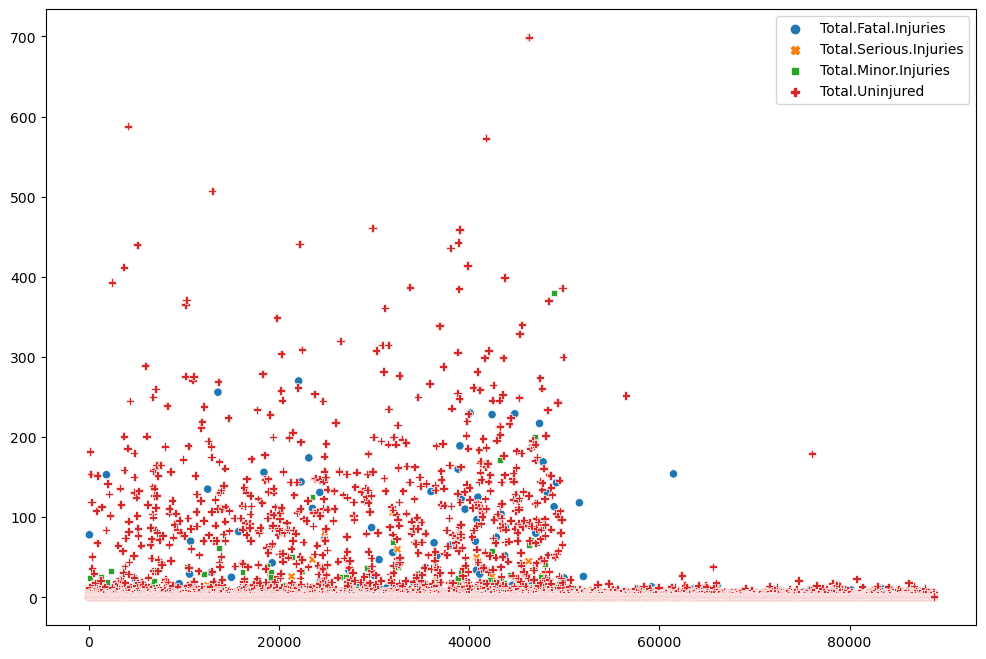

In [20]:
# Use of scatterplot to check if there any outliers so as to inform what to use to fill the missing values.
plt.figure(figsize=(12,8))
sns.scatterplot(aviation_df)
plt.show()


In [21]:
#The data has some outliers and is postively skewed-right skewed hence use of median to fill the missing values
aviation_df['Total.Fatal.Injuries'].fillna(aviation_df['Total.Fatal.Injuries'].median(), inplace=True)
aviation_df['Total.Serious.Injuries'].fillna(aviation_df['Total.Serious.Injuries'].median(), inplace=True)
aviation_df['Total.Minor.Injuries'].fillna(aviation_df['Total.Minor.Injuries'].median(), inplace=True)
aviation_df['Total.Uninjured'].fillna(aviation_df['Total.Uninjured'].median(), inplace=True)

In [22]:
#Using Mode to fill categorical null values
aviation_df['Broad.phase.of.flight'].fillna(aviation_df['Broad.phase.of.flight'].mode()[0], inplace=True)

## Data Modeling
Feature Engineering for analyzing or modeling the data.

C:\Users\Isaiah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


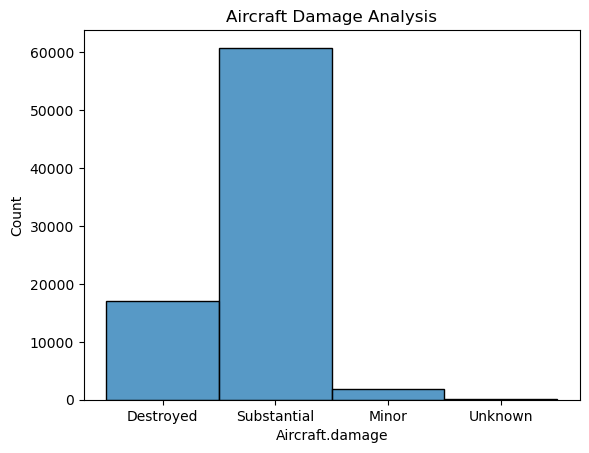

In [24]:
# Visualization histogram
sns.histplot(data=aviation_df, x='Aircraft.damage')
plt.title('Aircraft Damage Analysis')
plt.show()

C:\Users\Isaiah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


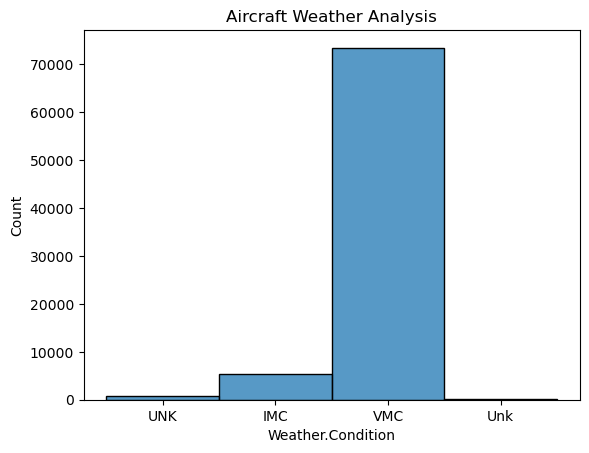

In [25]:
# Visualization histogram
sns.histplot(data=aviation_df, x='Weather.Condition')
plt.title('Aircraft Weather Analysis')
plt.show()

C:\Users\Isaiah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


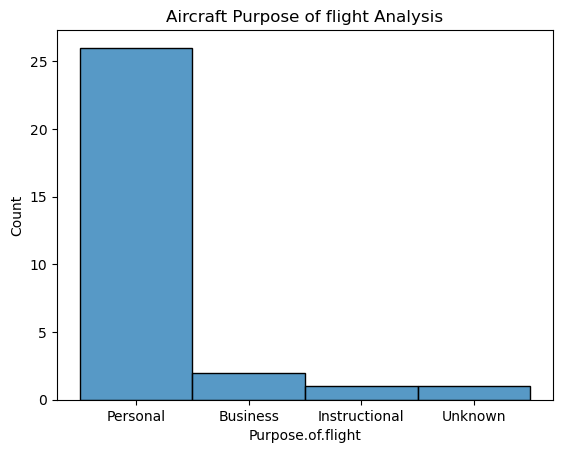

In [26]:
# Visualization histogram
sns.histplot(data=aviation_df.head(30), x='Purpose.of.flight')
plt.title('Aircraft Purpose of flight Analysis')
plt.show()

In [27]:
#Calculate correlation
aviation_df_corr = aviation_df.select_dtypes(include=['number'])
aviation_df_corr = aviation_df_corr.corr()
aviation_df_corr

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Total.Fatal.Injuries,1.000000,0.171401,0.047060,-0.011139
Total.Serious.Injuries,0.171401,1.000000,0.233095,0.016408
Total.Minor.Injuries,0.047060,0.233095,1.000000,0.116734
Total.Uninjured,-0.011139,0.016408,0.116734,1.000000


<Axes: >

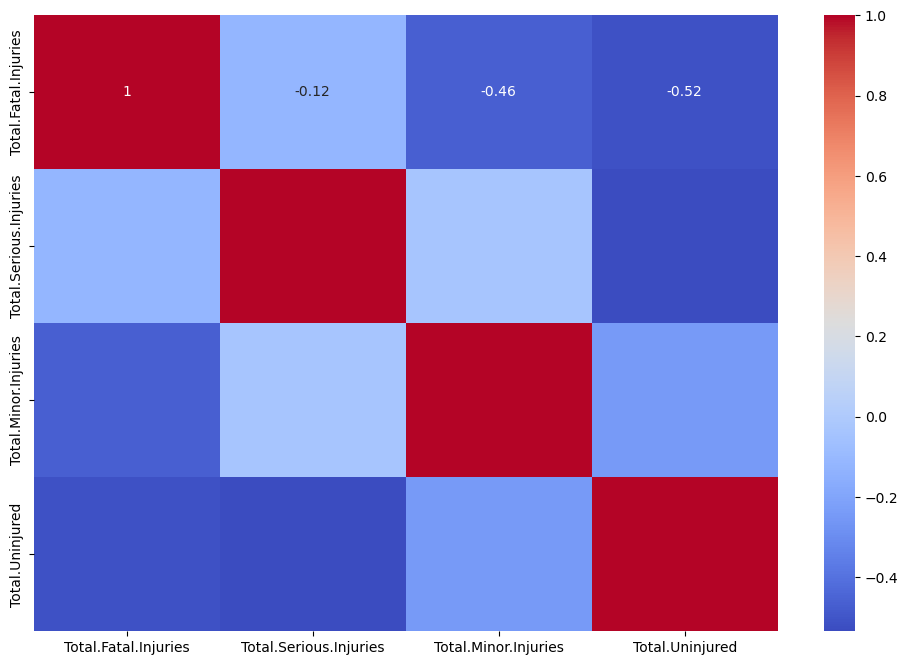

In [28]:
#Visualization heatmap
plt.figure(figsize=(12,8))
sns.heatmap(aviation_df_corr.corr(), annot=True, cmap='coolwarm')

<Axes: >

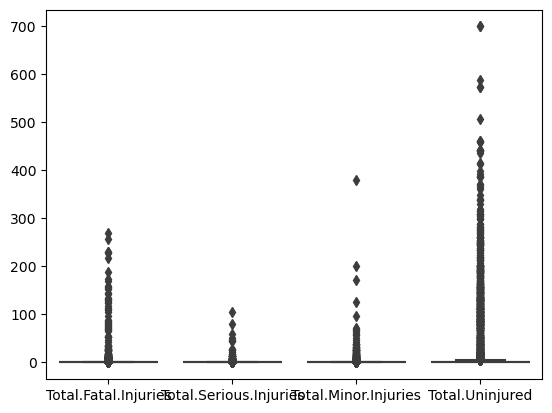

In [29]:
sns.boxplot(data=aviation_df)

Text(0.5, 1.0, 'Broad.phase.of.flight')

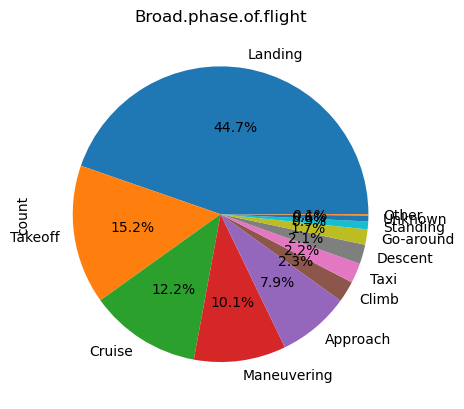

In [30]:
aviation_df['Broad.phase.of.flight'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.title('Broad.phase.of.flight')

## Evaluation
Risk Analysis Evaluation.

***
* Aircraft Damage: Destroyed aircraft pose higher risks.
* Purpose of Flight: Commercial flights showed lower risks compared to personal flights.
* Weather Conditions: Adverse weather significantly increases risks
* Modern aircraft consistently demonstrate lower risks.
***

## Conclusion
* Data-driven insights support effective purchasing decisions.
* There was assumption that data may contain biases that need acknowledgement during analysis
* Important factors influencing decisions include aircraft damage, weather conditions and injuries.
* Focus on safety, compliance, and operational reliability.
* Future modeling can refine purchasing behavior.